In [1]:
print("Hello World")

Hello World


### Intro to Sklearn 

0. An end-to-end Scikit-Learn worfklow
1. Getting the data ready
2. Choosing the right maching learning estimator/aglorithm/model for your problem
3. Fitting your chosen machine learning model to data and using it to make a prediction
4. Evaluting a machine learning model
5. Improving predictions through experimentation (hyperparameter tuning)
6. Saving and loading a pretrained model
7. Putting it all together in a pipeline

## 0. Work flow

In [2]:
# get the data

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
heart_disease = pd.read_csv("data/files/heart-disease.csv");
heart_disease


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
# create X (feature matrix)
X = heart_disease.drop("target", axis=1)

# create y (labels)
y = heart_disease["target"]


In [4]:
# choosing the right model and hyperparameters

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

#keep the deafault hyperparamters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [5]:
# 3. fit the model

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [6]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [142]:
# make a prediction
y_label = clf.predict(np.array([1, 2, 3, 4]))

c:\Users\bello\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[1. 2. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [7]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
240,70,1,2,160,269,0,1,112,1,2.9,1,1,3
162,41,1,1,120,157,0,1,182,0,0.0,2,0,2
155,58,0,0,130,197,0,1,131,0,0.6,1,0,2
242,64,1,0,145,212,0,0,132,0,2.0,1,2,1
152,64,1,3,170,227,0,0,155,0,0.6,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,77,1,0,125,304,0,0,162,1,0.0,2,3,2
267,49,1,2,118,149,0,0,126,0,0.8,2,3,2
207,60,0,0,150,258,0,0,157,0,2.6,1,2,3
14,58,0,3,150,283,1,0,162,0,1.0,2,0,2


In [8]:
y_preds = clf.predict(X_test)
y_preds

array([0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0])

In [9]:
y_test

240    0
162    1
155    1
242    0
152    1
      ..
238    0
267    0
207    0
14     1
276    0
Name: target, Length: 61, dtype: int64

In [11]:
y_test.head()

240    0
162    1
155    1
242    0
152    1
Name: target, dtype: int64

In [12]:
# 4. Evaluate the model
clf.score(X_train, y_train)

1.0

In [13]:
clf.score(X_test, y_test)

0.8524590163934426

In [14]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.83      0.80      0.82        25
           1       0.86      0.89      0.88        36

    accuracy                           0.85        61
   macro avg       0.85      0.84      0.85        61
weighted avg       0.85      0.85      0.85        61



In [16]:
confusion_matrix(y_test, y_preds)

array([[20,  5],
       [ 4, 32]])

In [17]:
accuracy_score(y_test, y_preds)

0.8524590163934426

In [18]:
# 5. try a different model
# Try different numbers of estimators (trees)... (no cross-validation)
np.random.seed(42)
for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators...")
    model = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print(f"Model accuracy on test set: {model.score(X_test, y_test) * 100:.2f}%")
    print("")

Trying model with 10 estimators...
Model accuracy on test set: 78.69%

Trying model with 20 estimators...
Model accuracy on test set: 77.05%

Trying model with 30 estimators...
Model accuracy on test set: 81.97%

Trying model with 40 estimators...
Model accuracy on test set: 78.69%

Trying model with 50 estimators...
Model accuracy on test set: 80.33%

Trying model with 60 estimators...
Model accuracy on test set: 80.33%

Trying model with 70 estimators...
Model accuracy on test set: 81.97%

Trying model with 80 estimators...
Model accuracy on test set: 81.97%

Trying model with 90 estimators...
Model accuracy on test set: 80.33%



In [19]:
## 6. save the model and load it

import pickle

pickle.dump(clf, open("data/model/random_forest_model_1.pkl", "wb"))

In [20]:
loaded_model = pickle.load(open("data/model/random_forest_model_1.pkl", "rb"))
loaded_model.score(X_test, y_test)

0.8524590163934426

In [21]:
what_we_are_doing = [
    "0. An end-to-end Scikit-Learn worfklow ",
    "1. Getting the data ready",
    "2. Choosing the right maching learning estimator/aglorithm/model for your problem",
    "3. Fitting your chosen machine learning model to data and using it to make a prediction",
    "4. Evaluting a machine learning model",
    "5. Improving predictions through experimentation (hyperparameter tuning)",
    "6. Saving and loading a pretrained model,",
    "7. Putting it all together in a pipeline"]

In [22]:
what_we_are_doing

['0. An end-to-end Scikit-Learn worfklow ',
 '1. Getting the data ready',
 '2. Choosing the right maching learning estimator/aglorithm/model for your problem',
 '3. Fitting your chosen machine learning model to data and using it to make a prediction',
 '4. Evaluting a machine learning model',
 '5. Improving predictions through experimentation (hyperparameter tuning)',
 '6. Saving and loading a pretrained model,',
 '7. Putting it all together in a pipeline']

## 1. Get the data ready

Three of the main steps you'll often have to take are:

* Splitting the data into features (usually X) and labels (usually y).
* Splitting the data into training and testing sets (and possibly a validation set).
* Filling (also called imputing) or disregarding missing values.
* Converting non-numerical values to numerical values (also call feature encoding).
Let's see an example.

In [23]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [24]:
heart_disease.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [25]:
X = heart_disease.drop("target", axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [26]:
y = heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [27]:
# Split the data into taining and test sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2 )

In [28]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [29]:
X.shape

(303, 13)

In [30]:
len(heart_disease)

303

In [31]:
# 80% of data is being used for the training set (the model will learn patterns on these samples)
X.shape[0] * 0.8

242.4

In [32]:
# And 20% of the data is being used for the testing set (the model will be evaluated on these samples)
X.shape[0] * 0.2

60.6

## 1.1 Make sure its all numerical

In [33]:
car_sales = pd.read_csv("data/files/car-sales-extended.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
...,...,...,...,...,...
995,Toyota,Black,35820,4,32042
996,Nissan,White,155144,3,5716
997,Nissan,Blue,66604,4,31570
998,Honda,White,215883,4,4001


In [34]:
len(car_sales)

1000

In [35]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [36]:
## split the data to x and y

X = car_sales.drop("Price", axis=1)
y = car_sales["Price"]

# split to traing and test
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    train_size=0.2)

In [37]:
# build a model

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

ValueError: could not convert string to float: 'Toyota'

convert the strings to number like honda, toyota, etc

In [38]:
car_sales["Doors"].value_counts()

Doors
4    856
5     79
3     65
Name: count, dtype: int64

In [39]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
...,...,...,...,...,...
995,Toyota,Black,35820,4,32042
996,Nissan,White,155144,3,5716
997,Nissan,Blue,66604,4,31570
998,Honda,White,215883,4,4001


In [40]:
# 1. Import OneHotEncoder and ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# 2. Define the categorical features to transform
categorical_features = ["Make", "Colour", "Doors"]

# 3. Create an instance of OneHotEncoder
one_hot = OneHotEncoder()

# 4. Create an instance of ColumnTransformer
transformer = ColumnTransformer([("one_hot", # name
                                  one_hot, # transformer
                                  categorical_features)], # columns to transform
                                  remainder="passthrough") # what to do with the rest of the columns? ("passthrough" = leave unchanged) 

# 5. Turn the categorical features into numbers (this will return an array-like sparse matrix, not a DataFrame)
transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [41]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [42]:
pd.DataFrame(transformed_X).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0


In [43]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
...,...,...,...,...,...
995,Toyota,Black,35820,4,32042
996,Nissan,White,155144,3,5716
997,Nissan,Blue,66604,4,31570
998,Honda,White,215883,4,4001


In [44]:
# One-hot encode categorical variables
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,False,True,False,False,False,False,False,False,True
1,5,True,False,False,False,False,True,False,False,False
2,4,False,True,False,False,False,False,False,False,True
3,4,False,False,False,True,False,False,False,False,True
4,3,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
995,4,False,False,False,True,True,False,False,False,False
996,3,False,False,True,False,False,False,False,False,True
997,4,False,False,True,False,False,True,False,False,False
998,4,False,True,False,False,False,False,False,False,True


In [46]:
# Have to convert doors to object for dummies to work on it...
car_sales["Doors"] = car_sales["Doors"].astype(object)
dummies = pd.get_dummies(data=car_sales[["Make", "Colour", "Doors"]],
                         dtype=float)
dummies.head()

,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White,Doors_3,Doors_4,Doors_5
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [47]:
np.random.seed(42)

# Create train and test splits with transformed_X
X_train, X_test, y_train, y_test = train_test_split(transformed_X,
                                                    y,
                                                    test_size=0.2)

# Create the model instance
model = RandomForestRegressor()

# Fit the model on the numerical data (this errored before since our data wasn't fully numeric)
model.fit(X_train, y_train)

# Score the model (returns r^2 metric by default, also called coefficient of determination, higher is better)
model.score(X_test, y_test)

0.3235867221569877

In [48]:
X

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3
...,...,...,...,...
995,Toyota,Black,35820,4
996,Nissan,White,155144,3
997,Nissan,Blue,66604,4
998,Honda,White,215883,4


## What if there were missing values in the data?

Holes in the data means holes in the patterns your machine learning model can learn.

Many machine learning models don't work well or produce errors when they're used on datasets with missing values.

A missing value can appear as a blank, as a NaN or something similar.

1. Fill them with some given or calculated value (imputation) - For example, you might fill missing values of a numerical column with the mean of all the other values. The practice of calculating or figuring out how to fill missing values in a dataset is called imputing. 

2. Remove them - If a row or sample has missing values, you may opt to remove them from your dataset completely. However, this potentially results in using less data to build your model.

In [49]:
# Import car sales dataframe with missing values
car_sales_missing = pd.read_csv("data/files/car-sales-extended-missing-data.csv") 
car_sales_missing.head(10)

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
5,Honda,Red,42652.0,4.0,23883.0
6,Toyota,Blue,163453.0,4.0,8473.0
7,Honda,White,NaN,4.0,20306.0
8,NaN,White,130538.0,4.0,9374.0
9,Honda,Blue,51029.0,4.0,26683.0


In [50]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [51]:
len(car_sales_missing)

1000

In [52]:
# Create features X
X_missing = car_sales_missing.drop("Price", axis=1)
print(f"Number of missing X values:\n{X_missing.isna().sum()}")

Number of missing X values:
Make             49
Colour           50
Odometer (KM)    50
Doors            50
dtype: int64


In [53]:
X_missing.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431.0,4.0
1,BMW,Blue,192714.0,5.0
2,Honda,White,84714.0,4.0
3,Toyota,White,154365.0,4.0
4,Nissan,Blue,181577.0,3.0


In [54]:
# Create labels y
y_missing = car_sales_missing["Price"]
print(f"Number of missing y values: {y_missing.isna().sum()}")

Number of missing y values: 50


In [55]:
y_missing

0      15323.0
1      19943.0
2      28343.0
3      13434.0
4      14043.0
        ...   
995    32042.0
996     5716.0
997    31570.0
998     4001.0
999    12732.0
Name: Price, Length: 1000, dtype: float64

In [56]:
# Let's convert the categorical columns to one hot encoded 
# Turn the categories (Make and Colour) into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]

one_hot = OneHotEncoder()

transformer = ColumnTransformer([("one_hot", 
                                  one_hot, 
                                  categorical_features)],
                                remainder="passthrough",
                                sparse_threshold=0) # return a sparse matrix or not

transformed_X_missing = transformer.fit_transform(X_missing)
transformed_X_missing

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [57]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(transformed_X_missing,
                                                    y_missing,
                                                    test_size=0.2)

# Fit and score a model
model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

ValueError: Input y contains NaN.

In [58]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

## 1.2.1 Fill missing data with pandas

In [59]:
car_sales_missing = pd.read_csv("data/files/car-sales-extended-missing-data.csv") 

In [60]:
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [61]:
car_sales_missing["Make"] = car_sales_missing["Make"].fillna(value="missing")

In [62]:
car_sales_missing["Colour"] = car_sales_missing["Colour"].fillna(value="missing")

In [63]:
X_missing = car_sales_missing.drop("Price", axis=1)
print(f"Number of missing X values:\n{X_missing.isna().sum()}")

Number of missing X values:
Make              0
Colour            0
Odometer (KM)    50
Doors            50
dtype: int64


In [64]:
# Create labels y
y_missing = car_sales_missing["Price"]
print(f"Number of missing y values: {y_missing.isna().sum()}")

Number of missing y values: 50


In [65]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [66]:
# Find the most common value of the Doors column
car_sales_missing["Doors"].value_counts()

Doors
4.0    811
5.0     75
3.0     64
Name: count, dtype: int64

In [67]:
# Fill the Odometer (KM) column

car_sales_missing["Odometer (KM)"] = car_sales_missing["Odometer (KM)"].fillna(value=car_sales_missing["Odometer (KM)"].mean())

In [68]:
# Check the number of missing values
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors            50
Price            50
dtype: int64

In [69]:
# Fill the Doors column with the most common value
car_sales_missing["Doors"] = car_sales_missing["Doors"].fillna(value=4)

In [70]:
# Check the number of missing values
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [71]:
# Remove rows with missing Price labels
car_sales_missing.dropna(inplace=True)

In [72]:
# Check the number of missing values
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [73]:
# Check the number of total samples (previously was 1000)
len(car_sales_missing)

950

In [74]:
# Create features
X_missing = car_sales_missing.drop("Price", axis=1)
print(f"Number of missing X values:\n{X_missing.isna().sum()}")

# Create labels
y_missing = car_sales_missing["Price"]
print(f"Number of missing y values: {y_missing.isna().sum()}")

Number of missing X values:
Make             0
Colour           0
Odometer (KM)    0
Doors            0
dtype: int64
Number of missing y values: 0


In [75]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]

one_hot = OneHotEncoder()

transformer = ColumnTransformer([("one_hot", 
                                  one_hot, 
                                  categorical_features)],
                                remainder="passthrough",
                                sparse_threshold=0) # return a sparse matrix or not

transformed_X_missing = transformer.fit_transform(X_missing)
transformed_X_missing

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [76]:
# Split data into training and test sets
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X_missing,
                                                    y_missing,
                                                    test_size=0.2)

# Fit and score a model
model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.22011714008302485

## 1.2.2 Filling missing data and transforming categorical data with Scikit-Learn

In [77]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [78]:
car_sales_missing = pd.read_csv("data/files/car-sales-extended-missing-data.csv") 

In [79]:
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [80]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [81]:
# Drop the rows with missing in the Price column
car_sales_missing.dropna(subset=["Price"], inplace=True)

In [82]:
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [83]:
# Split into X and y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

# Split data into train and test
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [84]:
from sklearn.impute import SimpleImputer

# Create categorical variable imputer
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")

# Create Door column imputer
door_imputer = SimpleImputer(strategy="constant", fill_value=4)

# Create Odometer (KM) column imputer
num_imputer = SimpleImputer(strategy="mean")

In [85]:
# Define different column features
categorical_features = ["Make", "Colour"]
door_feature = ["Doors"]
numerical_feature = ["Odometer (KM)"]

In [86]:
from sklearn.compose import ColumnTransformer

# Create series of column transforms to perform
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, categorical_features),
    ("door_imputer", door_imputer, door_feature),
    ("num_imputer", num_imputer, numerical_feature)])

In [87]:
# Find values to fill and transform training data
filled_X_train = imputer.fit_transform(X_train)

# Fill values in to the test set with values learned from the training set
filled_X_test = imputer.transform(X_test)

# Check filled X_train
filled_X_train

array([['Honda', 'White', 4.0, 71934.0],
       ['Toyota', 'Red', 4.0, 162665.0],
       ['Honda', 'White', 4.0, 42844.0],
       ...,
       ['Toyota', 'White', 4.0, 196225.0],
       ['Honda', 'Blue', 4.0, 133117.0],
       ['Honda', 'missing', 4.0, 150582.0]], dtype=object)

In [88]:
# Get our transformed data array's back into DataFrame's
filled_X_train_df = pd.DataFrame(filled_X_train, 
                                 columns=["Make", "Colour", "Doors", "Odometer (KM)"])

filled_X_test_df = pd.DataFrame(filled_X_test, 
                                columns=["Make", "Colour", "Doors", "Odometer (KM)"])

# Check missing data in training set
filled_X_train_df.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [89]:
# Check missing data in the testing set
filled_X_test_df.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [90]:
# Check to see the original... still missing values
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [91]:
filled_X_train_df.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,71934.0
1,Toyota,Red,4.0,162665.0
2,Honda,White,4.0,42844.0
3,Honda,White,4.0,195829.0
4,Honda,Blue,4.0,219217.0


In [92]:
# Now let's one hot encode the features with the same code as before 
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]

one_hot = OneHotEncoder()

transformer = ColumnTransformer([("one_hot", 
                                  one_hot, 
                                  categorical_features)],
                                remainder="passthrough",
                                sparse_threshold=0) # return a sparse matrix or not

# Fill train and test values separately
transformed_X_train = transformer.fit_transform(filled_X_train_df)
transformed_X_test = transformer.transform(filled_X_test_df)

# Check transformed and filled X_train
transformed_X_train

array([[0.0, 1.0, 0.0, ..., 1.0, 0.0, 71934.0],
       [0.0, 0.0, 0.0, ..., 1.0, 0.0, 162665.0],
       [0.0, 1.0, 0.0, ..., 1.0, 0.0, 42844.0],
       ...,
       [0.0, 0.0, 0.0, ..., 1.0, 0.0, 196225.0],
       [0.0, 1.0, 0.0, ..., 1.0, 0.0, 133117.0],
       [0.0, 1.0, 0.0, ..., 1.0, 0.0, 150582.0]], dtype=object)

In [93]:
# Now we've transformed X, let's see if we can fit a model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

# Make sure to use the transformed data (filled and one-hot encoded X data)
model.fit(transformed_X_train, y_train)
model.score(transformed_X_test, y_test)

0.21229043336119102

## 2. Choosing the right estimator/algorithm for your problem

* Scikit-Learn refers to machine learning models and algorithms as estimators.
* Classification problem - predicting a category (heart disease or not).
    * Sometimes you'll see clf (short for classifier) used as a classification estimator instance's variable name.
* Regression problem - predicting a number (selling price of a car).
* Unsupervised problem (data with no labels) - clustering (grouping unlabelled samples with other similar unlabelled samples).

##### 2.1 Picking a machine learning model for a regression problem

In [94]:
# Get California Housing dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing; 

In [95]:
housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])
housing_df["target"] = pd.Series(housing["target"])
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [96]:
# How many samples?
len(housing_df)

20640

In [97]:
# Import the Ridge model class from the linear_model module
from sklearn.linear_model import Ridge

# Setup random seed
np.random.seed(42)

# Split the data into features (X) and labels (y)
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Institate and fit the model (on the training set)
model = Ridge()
model.fit(X_train, y_train)

# Check the score of the model (on the test set)
# The default score() metirc of regression aglorithms is R^2
model.score(X_test, y_test)

0.5758549611440126

What if `RidgeRegression` didn't work? Or what if we wanted to improve our results?

In [98]:
# Import the RandomForestRegressor model class from the ensemble module
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Split the data into features (X) and labels (y)
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Institate and fit the model (on the training set)
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Check the score of the model (on the test set)
# The default score metirc of regression aglorithms is R^2
model.score(X_test, y_test)

0.806652667101436

## 2.2 Picking a machine learning model for a classification problem

In [99]:
heart_disease = pd.read_csv("data/files/heart-disease.csv")

In [100]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [101]:
len(heart_disease)

303

In [102]:
# Import LinearSVC from the svm module
from sklearn.svm import LinearSVC

# Setup random seed
np.random.seed(42)

# Split the data into X (features/data) and y (target/labels)
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and fit the model (on the training set)
clf = LinearSVC(max_iter=1000, # iterations on the data, 1000 is the default
                dual="auto") # dual="auto" chooses best parameters for the model automatically
clf.fit(X_train, y_train)

# Check the score of the model (on the test set)
clf.score(X_test, y_test)

0.8688524590163934

Following the path (and skipping a few, don't worry, we'll get to this) we come up to EnsembleMethods again.

Except this time, we'll be looking at ensemble classifiers instead of regressors.

Remember our RandomForestRegressor from above?

We'll it has a dance partner, RandomForestClassifier which is an ensemble based machine model learning model for classification.

You might be able to guess what we can use it for (hint: classification problems).

Let's try!

In [103]:
# Import the RandomForestClassifier model class from the ensemble module
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Split the data into X (features/data) and y (target/labels)
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and fit the model (on the training set)
clf = RandomForestClassifier(n_estimators=100) # 100 is the default, but you could try 1000 and see what happens
clf.fit(X_train, y_train)

# Check the score of the model (on the test set)
clf.score(X_test, y_test)

0.8524590163934426

A little tidbit for modelling in machine learning is:

* If you have structured data (tables, spreadsheets or dataframes), use ensemble methods, such as, a Random Forest.
* If you have unstructured data (text, images, audio, things not in tables), use deep learning or transfer learning..

## 3. Fit the model to data and using it to make predictions

3.1 Fitting a model to data

In [104]:
# Import the RandomForestClassifier model class from the ensemble module
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Split the data into X (features/data) and y (target/labels)
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate the model (on the training set)
clf = RandomForestClassifier(n_estimators=100)

# Call the fit method on the model and pass it training data
clf.fit(X_train, y_train)

# Check the score of the model (on the test set)
clf.score(X_test, y_test)

0.8524590163934426

In [105]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [106]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

### 3.2 Making predictions using a machine learning model

Two of the most common and useful are `predict()` and `predict_proba()`

In [107]:
# Use a trained model to make predictions
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [108]:
# Compare predictions to truth
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)

np.float64(0.8524590163934426)

In [109]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

predict_proba() returns the probabilities of a classification label.

In [110]:
# Return probabilities rather than labels
clf.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [111]:
0.89 + 0.11, 0.43 + 0.57

(1.0, 1.0)

In [112]:
# Return labels
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1])

In [113]:
# Find prediction probabilities for 1 sample
clf.predict_proba(X_test[:1])

array([[0.89, 0.11]])

In [114]:
# Return the label for 1 sample
clf.predict(X_test[:1])

array([0])

`predict()` can also be used for regression models.

In [115]:
# Import the RandomForestRegressor model class from the ensemble module
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Split the data into features (X) and labels (y)
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Institate and fit the model (on the training set)
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions
y_preds = model.predict(X_test)

In [116]:
# Compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

0.32656738464147306

Now we've seen how to get a model how to find patterns in data using the fit() function and make predictions using what its learned using the predict() and predict_proba() functions, it's time to evaluate those predictions.

### 4. Evaluating a model

 3 different methods of evaluating models.

1. The score() method. Calling score() on a model instance will return a metric assosciated with the type of model you're using. The metric depends on which model you're using.
2. The scoring parameter. This parameter can be passed to methods such as cross_val_score() or GridSearchCV() to tell Scikit-Learn to use a specific type of scoring metric.
3. Problem-specific metric functions available in sklearn.metrics. Similar to how the scoring parameter can be passed different scoring functions, Scikit-Learn implements these as stand alone functions.

In [117]:
# Option one

# Import the RandomForestClassifier model class from the ensemble module
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Split the data into X (features/data) and y (target/labels)
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate the model (on the training set)
clf = RandomForestClassifier(n_estimators=100)

# Call the fit method on the model and pass it training data
clf.fit(X_train, y_train);

In [118]:
# Check the score of the model (on the test set)
clf.score(X_test, y_test)

0.8524590163934426

Let's use the score for regression problem

In [123]:
# Import the RandomForestRegressor model class from the ensemble module
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Split the data into features (X) and labels (y)
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Institate and fit the model (on the training set)
model = RandomForestRegressor()
model.fit(X_train, y_train);

In [124]:
# Check the score of the model (on the test set)
model.score(X_test, y_test)

0.806652667101436

In [126]:
# Using the scoring parameter

In [127]:
# Import cross_val_score from the model_selection module
from sklearn.model_selection import cross_val_score

# Import the RandomForestClassifier model class from the ensemble module
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Split the data into X (features/data) and y (target/labels)
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate the model (on the training set)
clf = RandomForestClassifier(n_estimators=100)

# Call the fit method on the model and pass it training data
clf.fit(X_train, y_train);

In [128]:
# Using score()
clf.score(X_test, y_test)

0.8524590163934426

cross_val_score cv(5) - 20 testing out of 100 then 40 then 60, 80, 100. 20 in five bit of 100

In [129]:
# Using cross_val_score()
cross_val_score(clf, X, y, cv=5) # cv = number of splits to test (5 by default)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [130]:
# 5-fold cross-validation
cross_val_score(clf, X, y, cv=5) # cv is equivalent to K

array([0.83606557, 0.8852459 , 0.7704918 , 0.8       , 0.8       ])

In [131]:
np.random.seed(42)

# Single training and test split score
clf_single_score = clf.score(X_test, y_test)

# Take mean of 5-fold cross-validation
clf_cross_val_score = np.mean(cross_val_score(clf, X, y, cv=5))

clf_single_score, clf_cross_val_score

(0.8524590163934426, np.float64(0.8248087431693989))

In [132]:
cross_val_score(clf, X, y, cv=5, scoring=None) # default scoring value, this can be set to other scoring metrics

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

####  Classification model evaluation metrics

Four of the main evaluation methods of classification models are:

1. Accuracy
2. Area under ROC curve (receiver operating characteristic curve)
3. Confusion matrix
4. Classification report

In [136]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [134]:
# Import cross_val_score from the model_selection module
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8524590163934426

In [135]:
# for accuracy 
# Accuracy as percentage
print(f"Heart Disease Classifier Accuracy: {clf.score(X_test, y_test) * 100:.2f}%")

Heart Disease Classifier Accuracy: 85.25%


#### Area Under Receiver Operating Characteristic (ROC) Curve

ROC curves are a comparison of true postive rate (tpr) versus false positive rate (fpr).

   * True positive = model predicts 1 when truth is 1
   * False positive = model predicts 1 when truth is 0
   * True negative = model predicts 0 when truth is 0
   * False negative = model predicts 0 when truth is 1

In [138]:
from sklearn.metrics import roc_curve

# Make predictions with probabilities
y_probs = clf.predict_proba(X_test)

# Keep the probabilites of the positive class only
y_probs = y_probs[:, 1]

# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Check the false positive rate
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03448276, 0.03448276, 0.03448276, 0.03448276, 0.06896552,
       0.06896552, 0.10344828, 0.13793103, 0.13793103, 0.17241379,
       0.17241379, 0.27586207, 0.4137931 , 0.48275862, 0.55172414,
       0.65517241, 0.72413793, 0.72413793, 0.82758621, 1.        ])

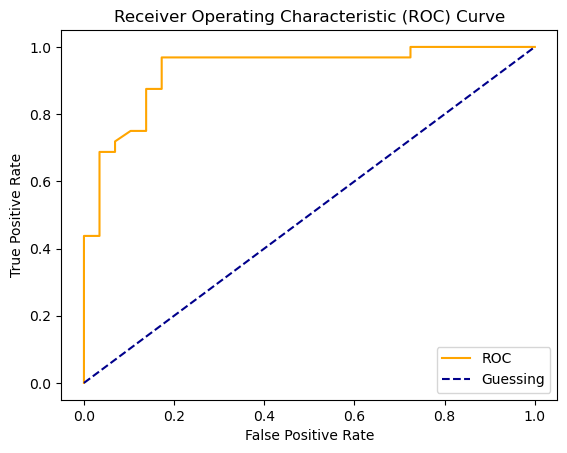

In [139]:
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positve rate (fpr) and 
    true postive rate (tpr) of a classifier.
    """
    # Plot ROC curve
    plt.plot(fpr, tpr, color='orange', label='ROC')
    # Plot line with no predictive power (baseline)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='Guessing')
    # Customize the plot
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)

In [140]:
from sklearn.metrics import roc_auc_score

roc_auc_score_value = roc_auc_score(y_test, y_probs)
roc_auc_score_value

np.float64(0.9304956896551724)

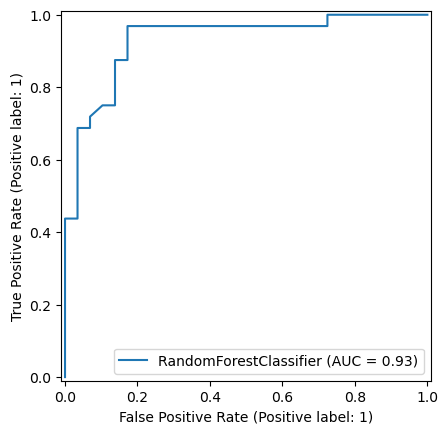

In [141]:
from sklearn.metrics import RocCurveDisplay
roc_curve_display = RocCurveDisplay.from_estimator(estimator=clf, 
                                                   X=X_test, 
                                                   y=y_test)

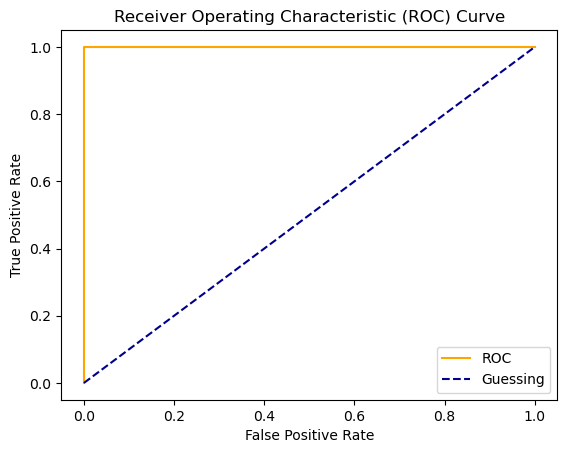

In [142]:
# Plot perfect ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [143]:
# Perfect ROC AUC score
roc_auc_score(y_test, y_test)

np.float64(1.0)

Confusion matrix

In [144]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[24,  5],
       [ 4, 28]])

In [145]:
pd.crosstab(y_test, 
            y_preds, 
            rownames=["Actual Label"], 
            colnames=["Predicted Label"])

Predicted Label,0,1
Actual Label,,
0,24,5
1,4,28


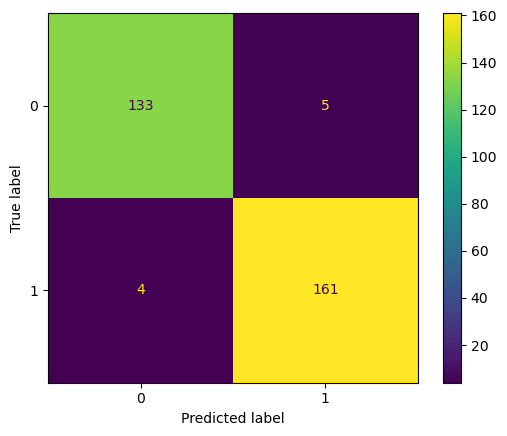

In [146]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=clf, X=X, y=y);

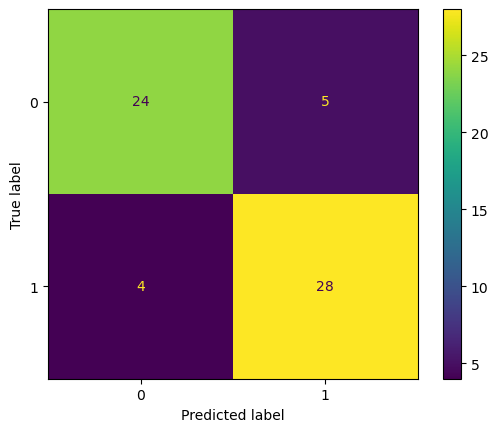

In [147]:
# Plot confusion matrix from predictions
ConfusionMatrixDisplay.from_predictions(y_true=y_test, 
                                        y_pred=y_preds);

Classification report

In [148]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



* Precision - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.
* Recall - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.
* F1 score - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.
* Support - The number of samples each metric was calculated on.
* Accuracy - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0, in other words, getting the prediction right 100% of the time.
* Macro avg - Short for macro average, the average precision, recall and F1 score between classes. Macro avg doesn't take class imbalance into effect. So if you do have class imbalances (more examples of one class than another), you should pay attention to this.
* Weighted avg - Short for weighted average, the weighted average precision, recall and F1 score between classes. Weighted means each metric is calculated with respect to how many samples there are in each class. This metric will favour the majority class (e.g. it will give a high value when one class out performs another due to having more samples).

In [149]:
# Where precision and recall become valuable
disease_true = np.zeros(10000)
disease_true[0] = 1 # only one case

disease_preds = np.zeros(10000) # every prediction is 0

pd.DataFrame(classification_report(disease_true, 
                                   disease_preds, 
                                   output_dict=True,
                                   zero_division=0))

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


- Accuracy is a good measure to start with if all classes are balanced (e.g. same amount of samples which are labelled with 0 or 1)
- Precision and recall become more important when classes are imbalanced.
- If false positive predictions are worse than false negatives, aim for higher precision.
- If false negative predictions are worse than false positives, aim for higher recall.

Regression model evaluation metrics